In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
cols = ['id', 'cycle']
for i in range(1,4):
    cols.append('op'+str(i))
for i in range(1,24):
    cols.append('sensor'+str(i))
df = pd.read_csv('Train_FD001.txt', sep=' ', names=cols)

In [4]:
df.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
dftest = pd.read_csv('Test_FD001.txt', sep=' ', names=cols)

In [6]:
dftest.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [7]:
df['remainingrul'] = df.groupby('id')['cycle'].transform(max) - df['cycle']

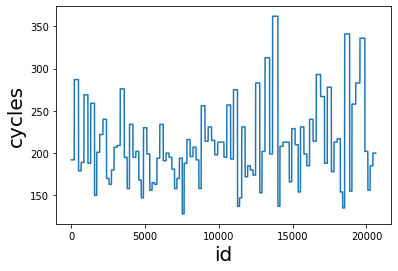

In [8]:
plt.plot(df.groupby('id')['cycle'].transform(max))
plt.xlabel('id', size=20)
plt.ylabel('cycles', size=20)
plt.show()

<AxesSubplot:>

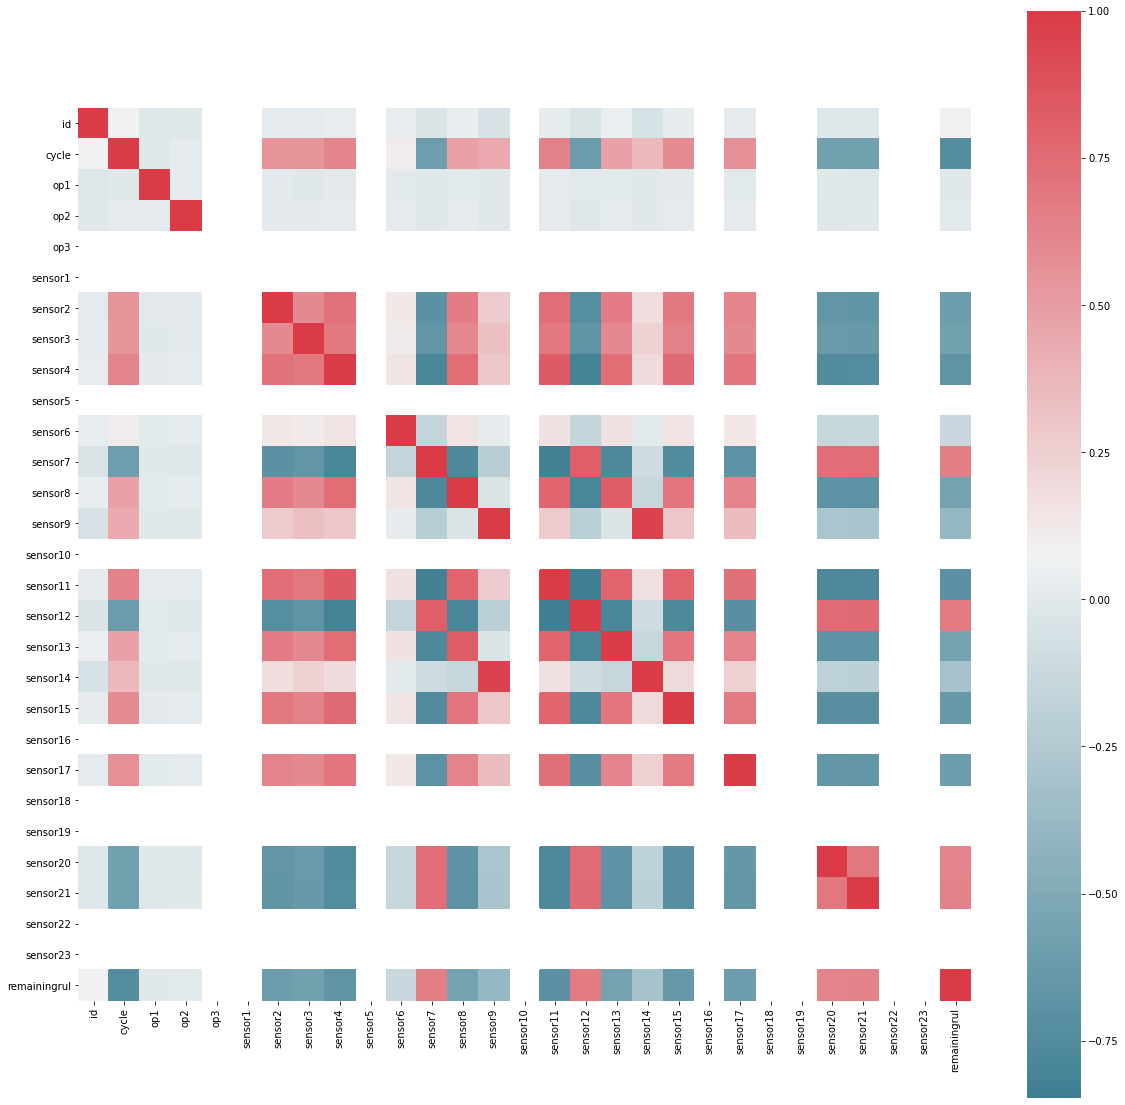

In [9]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [10]:
# cols_to_drop = corr.columns[corr.isna().all()].tolist()
# cols_to_drop.append('id')

In [11]:
# df.drop(cols_to_drop, axis = 1, inplace=True)

In [12]:
x = df.drop('remainingrul', axis = 1)
y = df['remainingrul']

In [13]:
x.shape

(20631, 28)

In [14]:
y.shape

(20631,)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
t = x.loc[:, ~x.columns.isin(['cycle'])].columns.tolist()

In [18]:
x[t].head()

,id,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [19]:
scaler.fit(x[t])

C:\Users\DELL\AppData\Local\conda\conda\envs\py3-TF2.0\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\DELL\AppData\Local\conda\conda\envs\py3-TF2.0\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


StandardScaler()

In [20]:
xs = scaler.transform(x[t])

In [21]:
x[t] = xs

<AxesSubplot:>

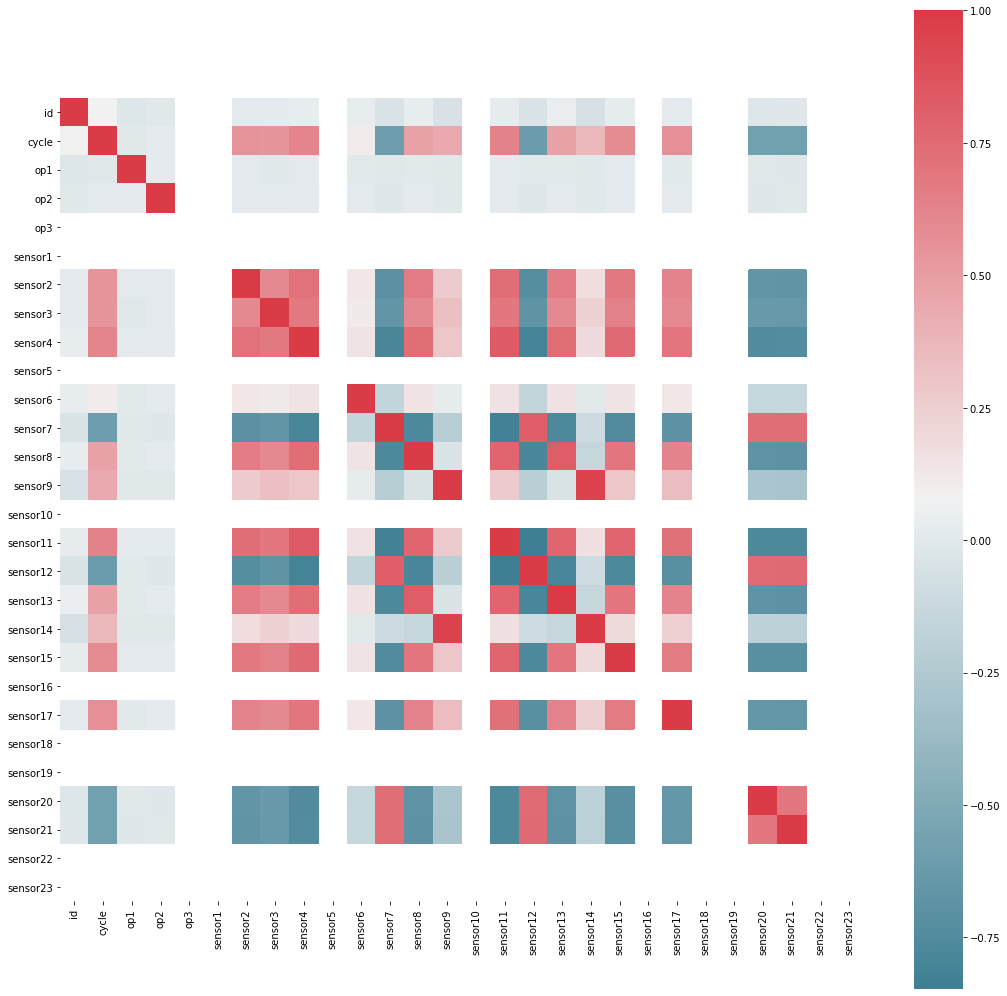

In [22]:
f, ax = plt.subplots(figsize=(18, 18))
corr = x.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
todrop = corr.columns[corr.isna().all()].tolist()

In [24]:
todrop.append('id')

In [25]:
x.drop(todrop, axis = 1, inplace=True)
print(x.shape)
display(x.head())

(20631, 18)


,cycle,op1,op2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,0.141683,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,2,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.141683,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,3,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,0.141683,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,4,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,0.141683,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,5,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.141683,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552


In [26]:
print(x.shape, y.shape)

(20631, 18) (20631,)


In [27]:
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(x, y,train_size=0.8, random_state=8)

In [28]:
print(xtr.shape, ytr.shape, xte.shape, yte.shape)

(16504, 18) (16504,) (4127, 18) (4127,)


In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [30]:
reg.fit(xtr, ytr)

LinearRegression()

In [31]:
reg.score(xtr, ytr)

0.6574432305507321

In [32]:
reg.intercept_

150.9744568489309

In [33]:
reg.coef_

array([-0.39746587, -0.11820451,  0.88855738, -2.81724073, -1.31206794,
       -4.18595192, -0.66458166,  3.8577373 , -2.36234985, -3.31306816,
       -5.83209011,  4.20320504, -1.66448757, -3.09831703, -3.190161  ,
       -1.26855306,  1.96447096,  2.44590862])

In [34]:
ypr = reg.predict(xte)

In [35]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yte, ypr)**0.5)

41.25455270909377


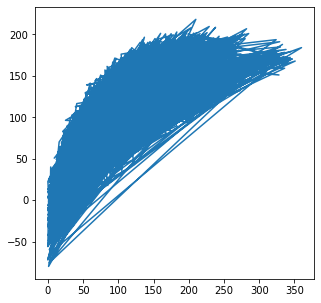

In [66]:
plt.plot(yte, ypr)

In [67]:
import lightgbm as lgb

In [68]:
lgbreg = lgb.LGBMRegressor(learning_rate = 0.01, n_estimators=5000, num_leaves=100,
                                objective='binary', metric='auc', random_state=50, n_jobs=-1)

In [70]:
lgbreg.fit(xtr, ytr)
yprlgb = lgbreg.predict(xte)
print('RMSE', mean_squared_error(yte, yprlgb)**0.5)

RMSE 128.37702721633545


In [63]:
import xgboost as xgb
xgbreg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 500)

In [64]:
xgbreg.fit(xtr, ytr)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
yprxgbreg = xgbreg.predict(xte)
print('RMSE: ',mean_squared_error(yte, yprxgbreg)**0.5)

RMSE:  36.96816941029244


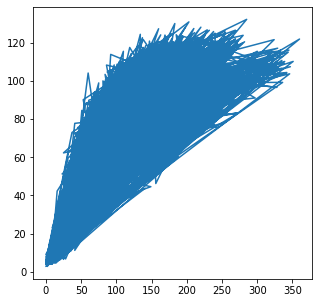

In [52]:
plt.plot(yte, yprxgbreg)

In [53]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
dmatrix = xgb.DMatrix(data=xtr,label=ytr)
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,116.384433,0.137074,116.426023,0.291014
1,106.430336,0.260236,106.498393,0.455016
2,97.393796,0.164284,97.489629,0.239767
3,89.664271,0.218329,89.800881,0.169523
4,82.705195,0.399523,82.888293,0.370981


In [55]:
print((cv_results["test-rmse-mean"]).tail(1))

49    36.293538
Name: test-rmse-mean, dtype: float64


[23:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


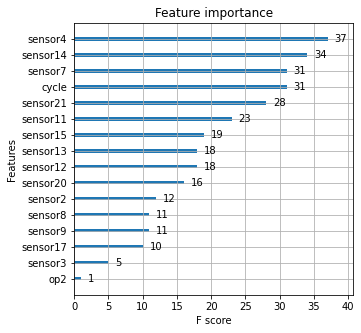

In [56]:
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [76]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
stkf = StratifiedKFold(n_splits=5)
xgbregrscv = xgb.XGBRegressor(n_estimators=725, n_jobs=-1)
params={
    'learning_rate': np.arange(0.01, 0.11, 0.025),
    'max_depth': np.arange(1, 10, 1),
    'min_child_weight': np.arange(1, 10, 1), 
    'subsample': np.arange( 0.7, 1, 0.05), 
    'gamma': np.arange(0.5, 1, 0.1), 
    'colsample_bytree': np.arange( 0.1, 1, 0.05), 
    'scale_pos_weight': np.arange( 20, 200, 10)
}
rscvclass = RandomizedSearchCV(xgbregrscv, param_distributions=params, cv=stkf, n_jobs=-1)
rscvclass.fit(xtr, ytr)
ypredxgb = rscvclass.predict(xte)
print('Best Params: \n', rscvclass.best_params_)

C:\Users\DELL\AppData\Local\conda\conda\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best Params: 
 {'subsample': 0.8500000000000001, 'scale_pos_weight': 70, 'min_child_weight': 6, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.7, 'colsample_bytree': 0.5500000000000002}


In [78]:
print('RMSE ', mean_squared_error(yte, ypredxgb)**0.5)

RMSE  36.40069619951018


In [83]:
yprtr = rscvclass.predict(xtr)
yprte = rscvclass.predict(xte)

Train RMSE  31.105820373227637
Test RMSE  36.40069619951018


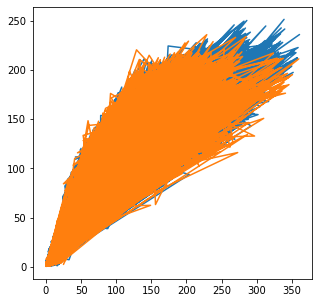

In [86]:
print('Train RMSE ', mean_squared_error(ytr, yprtr)**0.5)
print('Test RMSE ', mean_squared_error(yte, yprte)**0.5)
plt.plot(ytr, yprtr)
plt.plot(yte, yprte)